In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import urllib.request

url = 'http://ergast.com/downloads/f1db_csv.zip'
filehandle, _ = urllib.request.urlretrieve(url)
zf = zipfile.ZipFile(filehandle, 'r')

results_df = pd.read_csv(zf.open('results.csv'))
drivers_df = pd.read_csv(zf.open('drivers.csv'))
lap_times_df = pd.read_csv(zf.open('lap_times.csv'))
races_df = pd.read_csv(zf.open('races.csv'))
circuits_df = pd.read_csv(zf.open('circuits.csv'))
constructors_df = pd.read_csv(zf.open('constructors.csv'))
pit_stops_df = pd.read_csv(zf.open('pit_stops.csv'))

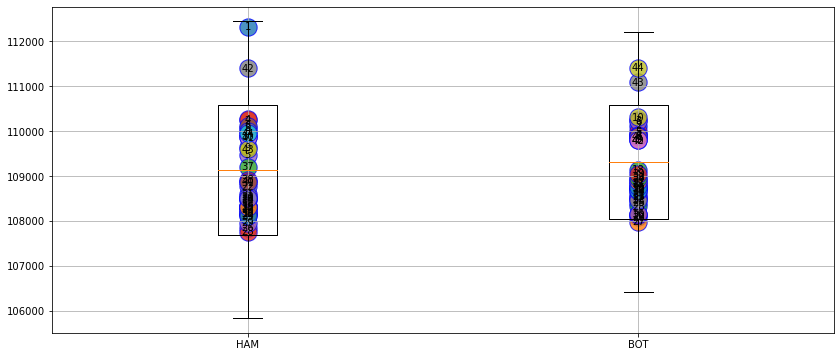

In [2]:
raceId = lap_times_df.raceId.drop_duplicates().iloc[-1]
for constructorId in results_df[results_df.raceId == raceId].constructorId.drop_duplicates().iloc[:1]:
    data_list = []
    plt.figure(figsize=(14, 6))
    for count, driverId in enumerate(results_df[(results_df.constructorId == constructorId) & (results_df.raceId == raceId)].driverId):
        race_df = lap_times_df[(lap_times_df.raceId == raceId) & (lap_times_df.driverId == driverId)].copy()
        q1 = race_df.milliseconds.quantile(0.25)
        q3 = race_df.milliseconds.quantile(0.75)
        cons = (q3 - q1) * 1.5
        high_lim = q3 + cons
        low_lim = q1 - cons
        code = drivers_df[drivers_df.driverId == driverId].code.iloc[-1]
        data_list.append([q3, high_lim, low_lim, q1, code])
        
        for lap in race_df[race_df.milliseconds <= high_lim].lap:
            lap_time_ms = race_df[race_df.lap == lap].milliseconds.iloc[-1]
            plt.scatter(count + 1, lap_time_ms, s=300, alpha=0.8, edgecolors='b')
            plt.text(count + 1, lap_time_ms, str(lap), horizontalalignment='center', verticalalignment='center')

    plt.boxplot([data_list[row][:4] for row in range(len(data_list))])
    plt.xticks([1, 2], [data_list[row][4:][0] for row in range(len(data_list))])
    plt.grid()
    plt.show()